#reddit comments Sentiment Analysis

Author: Sridivya Pagadala 

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import nltk

nltk.download('stopwords')
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
train=pd.read_csv("/content/reddit_200k_train.csv",encoding = "ISO-8859-1")
test=pd.read_csv("https://raw.githubusercontent.com/PSdiv/reddit/master/reddit_200k_test.csv",encoding = "ISO-8859-1")

In [ ]:
train.head()

,Unnamed: 0,body,score.x,parent_id.x,id,created_utc.x,retrieved_on,REMOVED
0,1,I've always been taught it emerged from the ea...,2,t3_81u15i,dv551g6,1520121101,1524782256,False
1,2,"As an ECE, my first feeling as ""HEY THAT'S NOT...",2,t3_72sk35,dnl66g6,1506533157,1507150439,True
2,3,Monday: Drug companies stock dives on good new...,5,t3_8o88yr,e02sjhz,1528087570,1532170350,True
3,4,i learned that all hybrids are unfertile i won...,0,t3_6xg9t8,dmfojjp,1504290041,1506407514,False
4,5,Well i was wanting to get wasted tonight. Not...,3,t3_99wi9m,e4rtew8,1535140675,1537893540,False


In [ ]:
train.shape,test.shape

((167529, 8), (55843, 8))

#EDA

###Class distribution

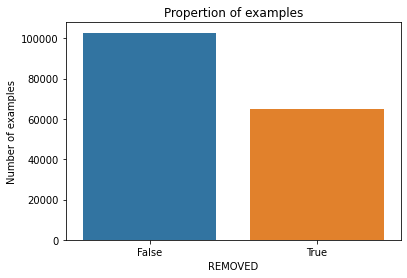

In [ ]:
sns.countplot(train['REMOVED'])
plt.ylabel('Number of examples')
plt.title('Propertion of examples')
plt.show()

###Wordcloud for Removed comments

In [ ]:
wordtext = " ".join(text for text in train[train['REMOVED']==True]['body'])

In [ ]:
len(wordtext)

10179568

In [ ]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
#Removing some words which are very frequent
STOPWORDS.add('people')
STOPWORDS.add('think')
STOPWORDS.add('one')
STOPWORDS.add('work')
STOPWORDS.add('will')
STOPWORDS.add('thing')
STOPWORDS.add('make')
STOPWORDS.add('time')
STOPWORDS.add('even')
STOPWORDS.add('know')
STOPWORDS.add('study')
STOPWORDS.add('way')
STOPWORDS.add('mean')
STOPWORDS.add('need')
STOPWORDS.add('human')
STOPWORDS.add('now')
STOPWORDS.add('say')
STOPWORDS.add('really')

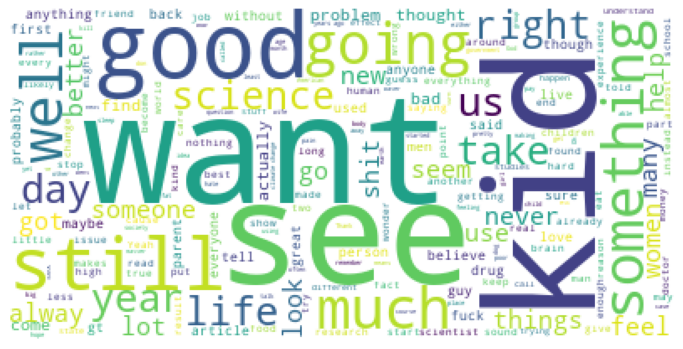

In [ ]:
# Generating the wordcloud with the values under the category dataframe
plt.figure(figsize=(12,8))
word_cloud = WordCloud(stopwords=STOPWORDS, background_color="white").generate(wordtext)
plt.imshow(word_cloud)
plt.axis('off')
plt.show()

###Wordcloud for Safe comments

In [ ]:
wordtext = " ".join(text for text in train[train['REMOVED']==False]['body'])

In [ ]:
len(wordtext)

30140797

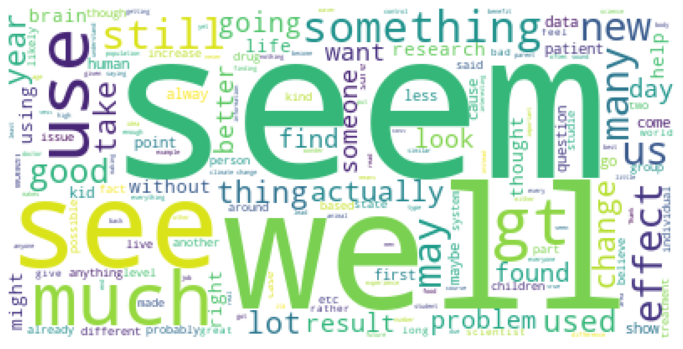

In [ ]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
# Generating the wordcloud with the values under the category dataframe
plt.figure(figsize=(12,8))
word_cloud = WordCloud(stopwords=STOPWORDS, background_color="white").generate(wordtext)
plt.imshow(word_cloud)
plt.axis('off')
plt.show()

###Word distribution in comments

In [ ]:
wordsTrue_len=train[train['REMOVED']==True]['body'].str.split().map(lambda x: len(x))
wordsFalse_len=train[train['REMOVED']==False]['body'].str.split().map(lambda x: len(x))

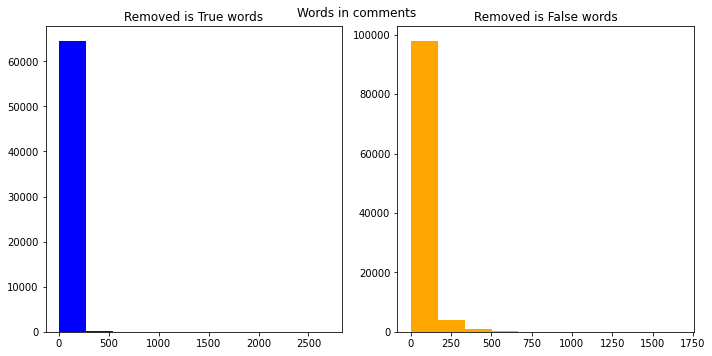

In [ ]:
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(10,5))
ax1.hist(wordsTrue_len,color='blue')
ax1.set_title('Removed is True words')
ax2.hist(wordsFalse_len,color='orange')
ax2.set_title('Removed is False words')
fig.suptitle('Words in comments')
plt.tight_layout()

###Character Distribution

In [ ]:
CharTrue_len=train[train['REMOVED']==True]['body'].apply(lambda x: len(x))
CharFalse_len=train[train['REMOVED']==False]['body'].apply(lambda x: len(x))

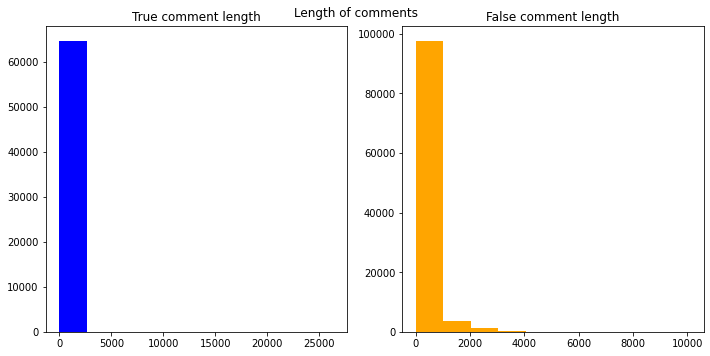

In [ ]:
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(10,5))
ax1.hist(CharTrue_len,color='blue')
ax1.set_title('True comment length')
ax2.hist(CharFalse_len,color='orange')
ax2.set_title('False comment length')
fig.suptitle('Length of comments')
plt.tight_layout()

###Punctuations in comments

In [ ]:
def create_corpus_punc(target):
    corpus=[]
    for x in train[train['REMOVED']==target]['body'].str.split():
        for i in x:
            corpus.append(i)
    return corpus

In [ ]:
corpus_1=create_corpus_punc(True)
corpus_0=create_corpus_punc(False)

In [ ]:
from collections import defaultdict
import string
dic_1=defaultdict(int)
dic_0=defaultdict(int)
special = string.punctuation
for i in (corpus_1):
    if i in special:
        dic_1[i]+=1
for i in (corpus_0):
    if i in special:
        dic_0[i]+=1       
x_1,y_1=zip(*dic_1.items())
x_0,y_0=zip(*dic_0.items())

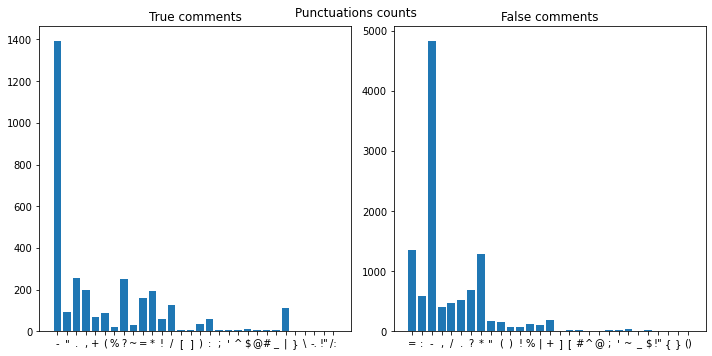

In [ ]:
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(10,5))
ax1.bar(x_1,y_1)
ax1.set_title("True comments")
ax2.bar(x_0,y_0)
ax2.set_title("False comments")
plt.suptitle("Punctuations counts")
plt.tight_layout()

###URL Distribution

In [ ]:
import re
def count_URL(text):
    url = re.compile(r'https?://\S+|www\.\S+')
    # url.sub(r'',text) this is for removing URL
    return len(url.findall(text))

In [ ]:
URLTrue_len=train[train['REMOVED']==True]['body'].apply(lambda x: count_URL(x))
URLFalse_len=train[train['REMOVED']==False]['body'].apply(lambda x: count_URL(x))

In [ ]:
countdict= dict(zip(['False','True'],[URLFalse_len.sum(),URLTrue_len.sum()]))

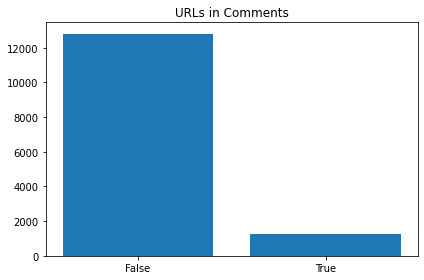

In [ ]:
# fig,ax=plt.subplot()
plt.bar(countdict.keys(),height=countdict.values())
plt.title("URLs in Comments")
plt.tight_layout()

###Words that are capital letters

In [ ]:
def countUpper(text):
  count=0
  for word in text.split():
    if word.isupper():
      count+=1
  return count

In [ ]:
CapsTrue_len=train[train['REMOVED']==True]['body'].apply(lambda x: countUpper(x))
CapsFalse_len=train[train['REMOVED']==False]['body'].apply(lambda x: countUpper(x))
CapWords_train=train['body'].apply(lambda x: countUpper(x))
CapWords_test=test['body'].apply(lambda x: countUpper(x))

In [ ]:
countdict= dict(zip(['False','True'],[CapsTrue_len.sum(),CapsFalse_len.sum()]))

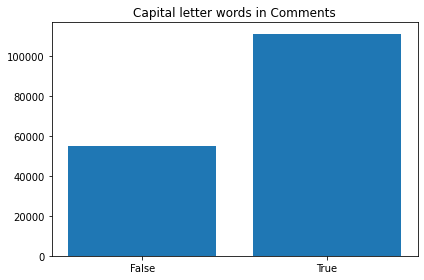

In [ ]:
plt.bar(countdict.keys(),height=countdict.values())
plt.title("Capital letter words in Comments")
plt.tight_layout()

###HTML tags in comments

In [ ]:
import re
def count_html(text):
    html=re.compile(r'<.*?>')
    # return html.sub(r'',text)
    return len(html.findall(text))


In [ ]:
HtmlTrue_len=train[train['REMOVED']==True]['body'].apply(lambda x: count_html(x))
HtmlFalse_len=train[train['REMOVED']==False]['body'].apply(lambda x: count_html(x))

In [ ]:
countdict= dict(zip(['False','True'],[HtmlFalse_len.sum(),HtmlTrue_len.sum()]))

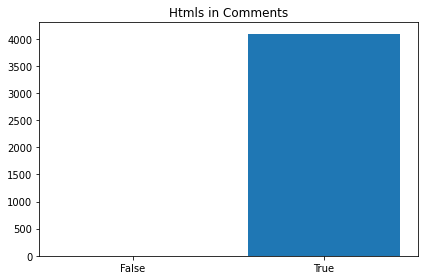

In [ ]:
# fig,ax=plt.subplot()
plt.bar(countdict.keys(),height=countdict.values())
plt.title("Htmls in Comments")
plt.tight_layout()

#Adding more features

###Punctation count as a feature

In [ ]:
import string
def count_punc(text):
  words= text.split()
  count=0
  for w in words:
    for c in w:
      if c in string.punctuation:
        count+=1
  return count

In [ ]:
train['punctuations']= train['body'].apply(lambda x:count_punc(x) )
test['punctuations']= test['body'].apply(lambda x:count_punc(x) )

###URL count as Feature

In [ ]:
train['URL']=train['body'].apply(lambda x: count_URL(x))
test['URL']=test['body'].apply(lambda x: count_URL(x))

###HTML text as Feature

In [ ]:
train['HTML']=train['body'].apply(lambda x: count_html(x))
test['HTML']=test['body'].apply(lambda x: count_html(x))

###Capital letter words as Features

In [ ]:
train["capWords"]= CapWords_train
test["capWords"]= CapWords_test

###Character length as Feature

In [ ]:
train['charLen']= train['body'].apply(len)
test['charLen']= test['body'].apply(len)

###Word count as Feature

In [ ]:
train['wordCount']= train['body'].apply(lambda x: len(x.split()))
test['wordCount']= test['body'].apply(lambda x: len(x.split()))

In [ ]:
train.head()

,Unnamed: 0,body,score.x,parent_id.x,id,created_utc.x,retrieved_on,REMOVED,punctuations,URL,HTML,capWords,charLen,wordCount
0,1,I've always been taught it emerged from the ea...,2,t3_81u15i,dv551g6,1520121101,1524782256,False,2,0,0,0,125,22
1,2,"As an ECE, my first feeling as ""HEY THAT'S NOT...",2,t3_72sk35,dnl66g6,1506533157,1507150439,True,10,0,0,5,229,39
2,3,Monday: Drug companies stock dives on good new...,5,t3_8o88yr,e02sjhz,1528087570,1532170350,True,2,0,0,0,61,10
3,4,i learned that all hybrids are unfertile i won...,0,t3_6xg9t8,dmfojjp,1504290041,1506407514,False,11,1,0,0,139,12
4,5,Well i was wanting to get wasted tonight. Not...,3,t3_99wi9m,e4rtew8,1535140675,1537893540,False,4,0,0,0,84,15


###Expand Contractions for VADER sentiments

In [ ]:
# Contraction Map
CONTRACTION_MAP = {
"ain't": "is not",
"aren't": "are not",
"can't": "cannot",
"can't've": "cannot have",
"'cause": "because",
"could've": "could have",
"couldn't": "could not",
"couldn't've": "could not have",
"didn't": "did not",
"doesn't": "does not",
"don't": "do not",
"hadn't": "had not",
"hadn't've": "had not have",
"hasn't": "has not",
"haven't": "have not",
"he'd": "he would",
"he'd've": "he would have",
"he'll": "he will",
"he'll've": "he will have",
"he's": "he is",
"how'd": "how did",
"how'd'y": "how do you",
"how'll": "how will",
"how's": "how is",
"I'd": "I would",
"I'd've": "I would have",
"I'll": "I will",
"I'll've": "I will have",
"I'm": "I am",
"I've": "I have",
"i'd": "i would",
"i'd've": "i would have",
"i'll": "i will",
"i'll've": "i will have",
"i'm": "i am",
"i've": "i have",
"isn't": "is not",
"it'd": "it would",
"it'd've": "it would have",
"it'll": "it will",
"it'll've": "it will have",
"it's": "it is",
"let's": "let us",
"ma'am": "madam",
"mayn't": "may not",
"might've": "might have",
"mightn't": "might not",
"mightn't've": "might not have",
"must've": "must have",
"mustn't": "must not",
"mustn't've": "must not have",
"needn't": "need not",
"needn't've": "need not have",
"o'clock": "of the clock",
"oughtn't": "ought not",
"oughtn't've": "ought not have",
"shan't": "shall not",
"sha'n't": "shall not",
"shan't've": "shall not have",
"she'd": "she would",
"she'd've": "she would have",
"she'll": "she will",
"she'll've": "she will have",
"she's": "she is",
"should've": "should have",
"shouldn't": "should not",
"shouldn't've": "should not have",
"so've": "so have",
"so's": "so as",
"that'd": "that would",
"that'd've": "that would have",
"that's": "that is",
"there'd": "there would",
"there'd've": "there would have",
"there's": "there is",
"they'd": "they would",
"they'd've": "they would have",
"they'll": "they will",
"they'll've": "they will have",
"they're": "they are",
"they've": "they have",
"to've": "to have",
"wasn't": "was not",
"we'd": "we would",
"we'd've": "we would have",
"we'll": "we will",
"we'll've": "we will have",
"we're": "we are",
"we've": "we have",
"weren't": "were not",
"what'll": "what will",
"what'll've": "what will have",
"what're": "what are",
"what's": "what is",
"what've": "what have",
"when's": "when is",
"when've": "when have",
"where'd": "where did",
"where's": "where is",
"where've": "where have",
"who'll": "who will",
"who'll've": "who will have",
"who's": "who is",
"who've": "who have",
"why's": "why is",
"why've": "why have",
"will've": "will have",
"won't": "will not",
"won't've": "will not have",
"would've": "would have",
"wouldn't": "would not",
"wouldn't've": "would not have",
"y'all": "you all",
"y'all'd": "you all would",
"y'all'd've": "you all would have",
"y'all're": "you all are",
"y'all've": "you all have",
"you'd": "you would",
"you'd've": "you would have",
"you'll": "you will",
"you'll've": "you will have",
"you're": "you are",
"you've": "you have"
}
def expand_contractions(text, contraction_mapping=CONTRACTION_MAP):
    
    contractions_pattern = re.compile('({})'.format('|'.join(contraction_mapping.keys())), 
                                      flags=re.IGNORECASE|re.DOTALL)
    # print(contractions_pattern)
    def expand_match(contraction):
        match = contraction.group(0)
        first_char = match[0]
        expanded_contraction = contraction_mapping.get(match)\
                                if contraction_mapping.get(match)\
                                else contraction_mapping.get(match.lower())                       
        expanded_contraction = first_char+expanded_contraction[1:]
        return expanded_contraction
    
    expanded_text = contractions_pattern.sub(expand_match, text)
    # print(expanded_text) 
    expanded_text = re.sub("'", "", expanded_text)
    # print(expanded_text) 
    return expanded_text

###Expand Train and Test text

In [ ]:
train['body']=train['body'].apply(lambda x: expand_contractions(x)).copy()

In [ ]:
train.head()

,Unnamed: 0,body,score.x,parent_id.x,id,created_utc.x,retrieved_on,REMOVED,punctuations,URL,HTML,capWords,charLen,wordCount
0,1,I have always been taught it emerged from the ...,2,t3_81u15i,dv551g6,1520121101,1524782256,False,2,0,0,0,125,22
1,2,"As an ECE, my first feeling as ""HEY That is NO...",2,t3_72sk35,dnl66g6,1506533157,1507150439,True,10,0,0,5,229,39
2,3,Monday: Drug companies stock dives on good new...,5,t3_8o88yr,e02sjhz,1528087570,1532170350,True,2,0,0,0,61,10
3,4,i learned that all hybrids are unfertile i won...,0,t3_6xg9t8,dmfojjp,1504290041,1506407514,False,11,1,0,0,139,12
4,5,Well i was wanting to get wasted tonight. Not...,3,t3_99wi9m,e4rtew8,1535140675,1537893540,False,4,0,0,0,84,15


###VADER sentiments as Features

In [ ]:
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

In [ ]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
sid = SentimentIntensityAnalyzer()

/usr/local/lib/python3.6/dist-packages/nltk/twitter/__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


In [ ]:
def vader_Scores(data):
  v_Pos=[]
  v_Neg=[]
  v_Neu=[]
  for idx in range(len(data)):
    ss=sid.polarity_scores(data[idx])
    v_Pos.append(ss['pos'])
    v_Neg.append(ss['neg'])
    v_Neu.append(ss['neu'])
  pos_df= pd.DataFrame(data=pd.Series(v_Pos) ,columns=['vaderPos'])
  neg_df= pd.DataFrame(data=pd.Series(v_Neg) ,columns=['vaderNeg'])
  neu_df= pd.DataFrame(data=pd.Series(v_Neu) ,columns=['vaderNeu'])
  senti= pd.concat([pos_df,neg_df,neu_df],ignore_index=False,axis=1)
  return senti

In [ ]:
vader_sentiments= vader_Scores(train['body'])

In [ ]:
train['vaderPos']=vader_sentiments['vaderPos']
train['vaderNeg']=vader_sentiments['vaderNeg']
train['vaderNeutral']=vader_sentiments['vaderNeu']

In [ ]:
vader_sentiments= vader_Scores(test['body'])

In [ ]:
test['vaderPos']=vader_sentiments['vaderPos']
test['vaderNeg']=vader_sentiments['vaderNeg']
test['vaderNeutral']=vader_sentiments['vaderNeu']

In [ ]:
train.head()

,Unnamed: 0,body,score.x,parent_id.x,id,created_utc.x,retrieved_on,REMOVED,punctuations,URL,HTML,capWords,charLen,wordCount,vaderPos,vaderNeg,vaderNeutral
0,1,I have always been taught it emerged from the ...,2,t3_81u15i,dv551g6,1520121101,1524782256,False,2,0,0,0,125,22,0.000,0.000,1.000
1,2,"As an ECE, my first feeling as ""HEY That is NO...",2,t3_72sk35,dnl66g6,1506533157,1507150439,True,10,0,0,5,229,39,0.089,0.000,0.911
2,3,Monday: Drug companies stock dives on good new...,5,t3_8o88yr,e02sjhz,1528087570,1532170350,True,2,0,0,0,61,10,0.244,0.000,0.756
3,4,i learned that all hybrids are unfertile i won...,0,t3_6xg9t8,dmfojjp,1504290041,1506407514,False,11,1,0,0,139,12,0.000,0.000,1.000
4,5,Well i was wanting to get wasted tonight. Not...,3,t3_99wi9m,e4rtew8,1535140675,1537893540,False,4,0,0,0,84,15,0.121,0.185,0.694


#Preprocessing

###Removing stopwords

In [ ]:
stop=set(stopwords.words('english'))

In [ ]:
def remove_stopwords(text):
  words= text.split()
  newtext=[]
  for w in words:
    if w.lower() not in stop and w.lower().isalpha() :
      newtext.append(w)
  return " ".join(newtext)

In [ ]:
train['body']=train['body'].apply(lambda x: remove_stopwords(x))
test['body']=test['body'].apply(lambda x: remove_stopwords(x))

###Lemmatization

In [ ]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

In [ ]:
lemm = nltk.stem.WordNetLemmatizer()

In [ ]:
def lemma(text):
  words= text.split()
  newtext=[]
  for w in words:
    newtext.append(lemm.lemmatize(w))
  return " ".join(newtext)

In [ ]:
train['body']=train['body'].apply(lambda x: lemma(x))
test['body']=test['body'].apply(lambda x: lemma(x))

###Stemming

In [ ]:
from nltk.stem.porter import PorterStemmer
porter_stemmer = PorterStemmer()

In [ ]:
def stemm(text):
  words= text.split()
  newtext=[]
  for w in words:
    newtext.append(porter_stemmer.stem(w))
  return " ".join(newtext)

In [ ]:
train['body']=train['body'].apply(lambda x: stemm(x))
test['body']=test['body'].apply(lambda x: stemm(x))

###Removing punctuations

In [ ]:
def remove_punct(text):
    table=str.maketrans('','',string.punctuation)
    return text.translate(table)

In [ ]:
train['body']= train['body'].apply(lambda x : remove_punct(x))
test['body']= test['body'].apply(lambda x: remove_punct(x))

###Removing URL

In [ ]:
def remove_URL(text):
    url = re.compile(r'https?://\S+|www\.\S+')
    return url.sub(r'',text)

In [ ]:
train['body']= train['body'].apply(lambda x : remove_URL(x))
test['body']= test['body'].apply(lambda x: remove_URL(x))

###Removing HTML

In [ ]:
def remove_html(text):
    html=re.compile(r'<.*?>')
    return html.sub(r'',text)


In [ ]:
train['body']= train['body'].apply(lambda x : remove_html(x))
test['body']= test['body'].apply(lambda x: remove_html(x))

###Fill empty string

In [ ]:
list_indx=train[train['body']==''].index

In [ ]:
train.loc[list_indx,'body']='Nothing'

In [ ]:
list_indx=test[test['body']==''].index

In [ ]:
test.loc[list_indx,'body']='Nothing'

###Train Test Split

In [ ]:
X_train= pd.DataFrame(train['body'].values,columns=['text'])
y_train= pd.DataFrame(train['REMOVED'].values,columns=['label'])
X_test= pd.DataFrame(test['body'].values,columns=['text'])
y_test= pd.DataFrame(test['REMOVED'].values,columns=['label'])

In [ ]:
#Encoding labels
y_train['label']=y_train['label'].apply(lambda x: 0 if x is False else 1)
y_test['label']=y_test['label'].apply(lambda x: 0 if x is False else 1)

#Get Metrics Function

In [ ]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
scores_dict=dict()
def get_metrics(clf,X,y,feature_type):
  y_pred= clf.predict(X)
  scores_dict[feature_type]=np.round(f1_score(y, y_pred, average='weighted')*100,2)
  print('Accuracy:  {:2.2%} '.format(accuracy_score(y, y_pred)))
  print('Precision: {:2.2%} '.format(precision_score(y, y_pred, average='weighted')))
  print('Recall:    {:2.2%} '.format(recall_score(y, y_pred, average='weighted')))
  print('F1 Score:  {:2.2%} '.format(f1_score(y, y_pred, average='weighted')))

#Bag of words

In [ ]:
vect = CountVectorizer(ngram_range=(1,1),stop_words=stop,min_df=2)
X_train_vect= vect.fit_transform(X_train['text'])
X_test_vect= vect.transform(X_test['text'])
print(len(vect.get_feature_names()))

23260


In [ ]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(max_iter=1000,C=0.01).fit(X_train_vect, y_train.values.ravel())

In [ ]:
get_metrics(lr,X_train_vect, y_train.values.ravel(),'BOW')

Accuracy:  66.57% 
Precision: 66.13% 
Recall:    66.57% 
F1 Score:  62.75% 


In [ ]:
get_metrics(lr,X_test_vect, y_test.values.ravel(),'BOW')

Accuracy:  65.75% 
Precision: 64.56% 
Recall:    65.75% 
F1 Score:  61.84% 


#BoW with N-grams

###Bigrams

In [ ]:
vect = CountVectorizer(ngram_range=(1,2),stop_words=stop,min_df=2)
X_train_vect= vect.fit_transform(X_train['text'])
X_test_vect= vect.transform(X_test['text'])
print(len(vect.get_feature_names()))

323618


In [ ]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(max_iter=1000,C=0.1).fit(X_train_vect, y_train.values.ravel())

In [ ]:
get_metrics(lr,X_train_vect, y_train.values.ravel(),'BOW bigram')

Accuracy:  76.44% 
Precision: 76.56% 
Recall:    76.44% 
F1 Score:  75.46% 


In [ ]:
get_metrics(lr,X_test_vect, y_test.values.ravel(),'BOW bigram')

Accuracy:  66.89% 
Precision: 65.71% 
Recall:    66.89% 
F1 Score:  65.32% 


###Trigrams

In [ ]:
vect = CountVectorizer(ngram_range=(3,3),min_df=2,stop_words=stop) #stop_words="english"
X_train_vect= vect.fit_transform(X_train['text'])
X_test_vect= vect.transform(X_test['text'])
print(len(vect.get_feature_names()))

51308


In [ ]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(max_iter=1000,C=1).fit(X_train_vect, y_train.values.ravel())

In [ ]:
get_metrics(lr,X_train_vect, y_train.values.ravel(),'BOW Trigram')

Accuracy:  65.68% 
Precision: 75.17% 
Recall:    65.68% 
F1 Score:  56.20% 


In [ ]:
get_metrics(lr,X_test_vect, y_test.values.ravel(),'BOW Trigram')

Accuracy:  61.81% 
Precision: 56.84% 
Recall:    61.81% 
F1 Score:  49.26% 


#BoW with char features

In [ ]:
vect = CountVectorizer(ngram_range=(2,4), analyzer="char",min_df=2,stop_words=stop)
X_train_vect= vect.fit_transform(X_train['text'])
X_test_vect= vect.transform(X_test['text'])
print(len(vect.get_feature_names()))

60211


In [ ]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(max_iter=1000,C=0.01).fit(X_train_vect, y_train.values.ravel())

In [ ]:
get_metrics(lr,X_train_vect, y_train.values.ravel(),'BOW char features')

Accuracy:  69.58% 
Precision: 68.95% 
Recall:    69.58% 
F1 Score:  67.97% 


In [ ]:
get_metrics(lr,X_test_vect, y_test.values.ravel(),'BOW char features')

Accuracy:  66.19% 
Precision: 64.89% 
Recall:    66.19% 
F1 Score:  64.50% 


#TFIDF features

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
tf = TfidfVectorizer(ngram_range=(1,1),min_df=2,max_features=10000,stop_words=stop)
X_train_tf= tf.fit_transform(X_train['text'])
X_test_tf= tf.transform(X_test['text'])
print(len(tf.get_feature_names()))

10000


In [ ]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(max_iter=1000,C=1).fit(X_train_tf, y_train.values.ravel())

In [ ]:
get_metrics(lr,X_train_tf, y_train.values.ravel(),'Tfidf one gram')

Accuracy:  70.37% 
Precision: 69.71% 
Recall:    70.37% 
F1 Score:  69.52% 


In [ ]:
get_metrics(lr,X_test_tf, y_test.values.ravel(),'Tfidf one gram')

Accuracy:  67.59% 
Precision: 66.66% 
Recall:    67.59% 
F1 Score:  66.66% 


###TFIDF Bigram

In [ ]:
tf = TfidfVectorizer(ngram_range=(1,2),min_df=2,max_features=10000,stop_words=stop)
X_train_tf= tf.fit_transform(X_train['text'])
X_test_tf= tf.transform(X_test['text'])
print(len(tf.get_feature_names()))

10000


In [ ]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(max_iter=1000,C=1).fit(X_train_tf, y_train.values.ravel())

In [ ]:
get_metrics(lr,X_train_tf, y_train.values.ravel(),'Tfidf Bigram')

Accuracy:  70.46% 
Precision: 69.81% 
Recall:    70.46% 
F1 Score:  69.64% 


In [ ]:
get_metrics(lr,X_test_tf, y_test.values.ravel(),'Tfidf Bigram')

Accuracy:  67.42% 
Precision: 66.48% 
Recall:    67.42% 
F1 Score:  66.51% 


#TFIDF with added new features

In [ ]:
import scipy
from scipy.sparse import csc_matrix, hstack
from sklearn.preprocessing import StandardScaler

In [ ]:
#Dense to sparse matrix convertion
def dense_to_sparse(data,feature):
  # return np.reshape(data[feature].ravel(),(len(data[feature]),1))
  # scaled_data= scal.fit_transform(data[feature].values.reshape(-1,1))
  return scipy.sparse.csc_matrix(data[feature].values.reshape(-1,1))
  # return scipy.sparse.csc_matrix(scaled_data)

In [ ]:
X_train_new= hstack([X_train_tf,
                     dense_to_sparse(train,'punctuations'),
                     dense_to_sparse(train,'URL'),
                     dense_to_sparse(train,'HTML'),
                     dense_to_sparse(train,'capWords'),
                     dense_to_sparse(train,'charLen'),
                     dense_to_sparse(train,'wordCount'),
                     dense_to_sparse(train,'vaderPos'),
                     dense_to_sparse(train,'vaderNeg'),
                     dense_to_sparse(train,'vaderNeutral')])
X_test_new= hstack([X_test_tf,
                    dense_to_sparse(test,'punctuations'),
                     dense_to_sparse(test,'URL'),
                     dense_to_sparse(test,'HTML'),
                     dense_to_sparse(test,'capWords'),
                     dense_to_sparse(test,'charLen'),
                     dense_to_sparse(test,'wordCount'),
                     dense_to_sparse(test,'vaderPos'),
                     dense_to_sparse(test,'vaderNeg'),
                     dense_to_sparse(test,'vaderNeutral')])

In [ ]:
X_train_new.shape 

(167529, 10009)

###Model evaluation

In [ ]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(max_iter=10000,C=1).fit(X_train_new, y_train.values.ravel())

In [ ]:
get_metrics(lr,X_train_new, y_train.values.ravel(),'TFIDF new_features')

Accuracy:  70.33% 
Precision: 69.68% 
Recall:    70.33% 
F1 Score:  69.57% 


In [ ]:
get_metrics(lr,X_test_new, y_test.values.ravel(),'TFIDF new_features')

Accuracy:  67.98% 
Precision: 67.13% 
Recall:    67.98% 
F1 Score:  67.18% 


#LSA with TruncatedSVD

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
vect = CountVectorizer(stop_words="english", min_df=4)
X_train_vect = vect.fit_transform(X_train['text'])
X_test_vect = vect.transform(X_test['text'])
X_train_vect.shape

(167529, 15346)

In [ ]:
from sklearn.decomposition import TruncatedSVD
lsa = TruncatedSVD(n_components=100)
X_lsa_train = lsa.fit_transform(X_train_vect)
X_lsa_test = lsa.transform(X_test_vect)
lsa.components_.shape

(100, 15346)

In [ ]:
lsa.components_

array([[ 1.60076726e-04,  1.03035514e-04,  2.56028479e-06, ...,
         1.04510610e-04,  7.65056184e-05,  1.11372781e-04],
       [-2.92462026e-06, -2.21532493e-06, -8.65305629e-09, ...,
        -2.30922144e-06, -1.35065599e-06, -3.09017469e-06],
       [-2.40666286e-04, -9.92482839e-05, -8.43518919e-06, ...,
        -8.06761424e-08, -1.68461737e-04,  6.28139058e-05],
       ...,
       [-1.83539942e-04,  1.72194943e-04,  1.82817309e-05, ...,
         2.13243104e-04, -4.20272270e-04, -1.83953413e-04],
       [-2.14576353e-04, -2.30053621e-04, -5.94686239e-06, ...,
         2.30010493e-04, -1.24633083e-04,  2.06179538e-04],
       [ 4.01383002e-04, -4.90641543e-05, -2.32798104e-05, ...,
        -2.29634410e-06, -9.01487028e-06,  4.84273888e-05]])

###Model Evaluation

In [ ]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(max_iter=10000,C=1).fit(X_lsa_train, y_train.values.ravel())

In [ ]:
get_metrics(lr,X_lsa_train, y_train.values.ravel(),'TruncatedSVD')

Accuracy:  62.83% 
Precision: 60.70% 
Recall:    62.83% 
F1 Score:  56.87% 


In [ ]:
get_metrics(lr,X_lsa_test, y_test.values.ravel(),'TruncatedSVD')

Accuracy:  62.93% 
Precision: 60.35% 
Recall:    62.93% 
F1 Score:  56.98% 


###Scaled feature model evaluation

In [ ]:
from sklearn.preprocessing import MaxAbsScaler
scaler = MaxAbsScaler()
X_train_scaled = scaler.fit_transform(X_train_vect)
X_test_scaled = scaler.transform(X_test_vect)

In [ ]:
lsa_scaled = TruncatedSVD(n_components=100)
X_lsa_train_scaled = lsa_scaled.fit_transform(X_train_scaled)
X_lsa_test_scaled = lsa_scaled.transform(X_test_scaled)

In [ ]:
lsa_scaled.components_.shape

(100, 15346)

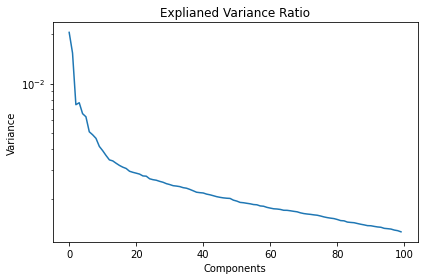

In [ ]:
plt.semilogy(lsa.explained_variance_ratio_)
plt.xlabel("Components")
plt.ylabel("Variance")
plt.title("Explianed Variance Ratio")

plt.tight_layout()

In [ ]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(max_iter=10000,C=1).fit(X_lsa_train_scaled, y_train.values.ravel())

In [ ]:
get_metrics(lr,X_lsa_train_scaled, y_train.values.ravel(),'TruncatedSVD_scaled')

Accuracy:  63.11% 
Precision: 61.34% 
Recall:    63.11% 
F1 Score:  56.72% 


In [ ]:
get_metrics(lr,X_lsa_test_scaled, y_test.values.ravel(),'TruncatedSVD_scaled')

Accuracy:  63.48% 
Precision: 61.44% 
Recall:    63.48% 
F1 Score:  57.16% 


#LDA

In [ ]:
vect = CountVectorizer(ngram_range=(1,1),stop_words=stop,min_df=2)
X_train_vect= vect.fit_transform(X_train['text'])
X_test_vect= vect.transform(X_test['text'])
print(len(vect.get_feature_names()))

23248


In [ ]:
from sklearn.decomposition import LatentDirichletAllocation
lda = LatentDirichletAllocation(n_components=25, learning_method="batch")
X_lda_train = lda.fit_transform(X_train_vect)
X_lda_test = lda.transform(X_test_vect)

###Topics

In [ ]:
n_top_words = 10
topic_summaries = []
# get topics and topic terms
topic_word = lda.components_ 
vocab = vect.get_feature_names()
for i, topic_dist in enumerate(topic_word):
    topic_words = np.array(vocab)[np.argsort(topic_dist)][:-(n_top_words+1):-1]
    topic_summaries.append(' '.join(topic_words))
    print('Topic {}: {}'.format(i, ' | '.join(topic_words)))

Topic 0: scienc | school | student | learn | educ | class | start | teach | commun | colleg
Topic 1: child | parent | kid | nothing | suicid | mother | babi | sure | commit | father
Topic 2: water | cost | rate | per | gun | increas | use | polic | ice | health
Topic 3: cancer | kill | diseas | cure | caus | bacteria | death | eat | heart | gut
Topic 4: associ | link | increas | journal | effect | use | risk | result | may | measur
Topic 5: compani | fat | diet | use | govern | sugar | low | weight | food | obes
Topic 6: word | person | oh | emot | use | posit | brain | neg | face | self
Topic 7: play | game | use | video | solar | oil | bad | power | hate | planet
Topic 8: woman | men | sex | gender | male | sexual | femal | like | mental | girl
Topic 9: money | never | pay | big | wait | tax | tell | man | go | live
Topic 10: drug | smoke | use | sound | mental | health | caus | take | cannabi | marijuana
Topic 11: year | drink | alcohol | old | found | ago | speci | size | age | org

###Model Evaluation

In [ ]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(max_iter=1000,C=1).fit(X_lda_train, y_train.values.ravel())

In [ ]:
get_metrics(lr,X_lda_train,y_train.values.ravel(),'LDA')

Accuracy:  62.95% 
Precision: 60.88% 
Recall:    62.95% 
F1 Score:  59.61% 


In [ ]:
get_metrics(lr,X_lda_test,y_test.values.ravel(),'LDA')

Accuracy:  63.68% 
Precision: 61.58% 
Recall:    63.68% 
F1 Score:  60.14% 


#Word embeddings spacy

In [ ]:
!python -m spacy download en_core_web_lg
#https://stackoverflow.com/questions/56927602/unable-to-load-the-spacy-model-en-core-web-lg-on-google-colab

✔ Download and installation successful
You can now load the model via spacy.load('en_core_web_lg')


In [ ]:
import spacy
nlp = spacy.load("en_core_web_lg", disable=["tagger", "parser", "ner"])
docs_train = [nlp(d).vector for d in train['body']]
X_train_emb = np.vstack(docs_train)
X_train_emb.shape

(167529, 300)

In [ ]:
docs_test = [nlp(d).vector for d in test['body']]
X_test_emb = np.vstack(docs_test)
X_test_emb.shape

(55843, 300)

###Model evaluation

In [ ]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(max_iter=1000,C=1).fit(X_train_emb, y_train.values.ravel())

In [ ]:
get_metrics(lr,X_train_emb, y_train.values.ravel(),'Spacy_wordEmb')

Accuracy:  65.89% 
Precision: 64.83% 
Recall:    65.89% 
F1 Score:  62.70% 


In [ ]:
get_metrics(lr,X_test_emb, y_test.values.ravel(),'Spacy_wordEmb')

Accuracy:  66.13% 
Precision: 64.88% 
Recall:    66.13% 
F1 Score:  63.00% 


#Genism Word2Vec

###Creating bigrams of common phrases

In [ ]:
from gensim.models.phrases import Phrases, Phraser

In [ ]:
#Phraser takes list of list of words as input
sent = [row.split() for row in train['body']]

In [ ]:
len(sent)

167529

In [ ]:
#The goal of Phraser() is to cut down memory consumption of Phrases(), by discarding model state not strictly needed for the bigram detection task
phrases = Phrases(sent, min_count=30, progress_per=10000)

In [ ]:
bigram = Phraser(phrases)

In [ ]:
#Transform the corpus based on the bigrams detected:
sentences = bigram[sent]

In [ ]:
#Most frequent words
word_freq = defaultdict(int)
for sent in sentences:
    for i in sent:
        word_freq[i] += 1
len(word_freq)

46378

Most frequent words

In [ ]:
sorted(word_freq, key=word_freq.get, reverse=True)[:10]

['use',
 'go',
 'see',
 'much',
 'want',
 'take',
 'year',
 'seem',
 'find',
 'research']

###Training word2Vec from given dataset instead of pretrained embeddings

In [ ]:
from gensim.corpora import Dictionary
import multiprocessing
from gensim.models import Word2Vec

In [ ]:
cores = multiprocessing.cpu_count() # Count the number of cores in a computer

In [ ]:
w2v_model = Word2Vec(min_count=20,
                     window=2,
                     size=300,
                     sample=6e-5, 
                     alpha=0.03, 
                     min_alpha=0.0007, 
                     negative=20,
                     workers=cores-1)

In [ ]:
# t = time()
w2v_model.build_vocab(sentences, progress_per=10000)
# print('Time to build vocab: {} mins'.format(round((time() - t) / 60, 2)))

Training model

In [ ]:
w2v_model.train(sentences, total_examples=w2v_model.corpus_count, epochs=30, report_delay=1)

(38528862, 72140670)

###Creating features from above trained word embeddings

In [ ]:
vocab= w2v_model.wv.vocab.keys()

In [ ]:
def create_corpus(data):
  return [row.split() for row in data['body']]

In [ ]:
def create_wordEmbeddings(data):
  corpus=create_corpus(data)
  corpus_vectors = []
  for words in corpus:
      corpus_vectors.append([])
      vec = np.zeros(w2v_model.vector_size)
      nwords = 0
      for word in words:
          if word in vocab: 
              vec = np.add(vec, w2v_model[word])
          nwords += 1
      vec = np.divide(vec, nwords)
      corpus_vectors[-1].append(vec.flatten())
  print(len(corpus_vectors))
  temp=[]
  for s in corpus_vectors:
    temp.append([])
    for w in s[0]:
        temp[-1].append(w)
  X_wordEmb = pd.DataFrame(temp)
  return X_wordEmb

In [ ]:
X_train_w2v=create_wordEmbeddings(train)
X_test_w2v=create_wordEmbeddings(test)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  # Remove the CWD from sys.path while we load stuff.


167529
55843


###Model evaluation

In [ ]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(max_iter=1000,C=1).fit(X_train_w2v, y_train.values.ravel())

In [ ]:
get_metrics(lr,X_train_w2v, y_train.values.ravel(),'Word2Vec')

Accuracy:  66.50% 
Precision: 65.37% 
Recall:    66.50% 
F1 Score:  64.63% 


In [ ]:
get_metrics(lr,X_test_w2v, y_test.values.ravel(),'Word2Vec')

Accuracy:  66.58% 
Precision: 65.32% 
Recall:    66.58% 
F1 Score:  64.70% 


###Pre trained Word2Vec

In [ ]:
w2v_model_prt = Word2Vec(sentences=create_corpus(train),
                     min_count=20,
                     window=2,
                     size=300,
                     sample=6e-5, 
                     alpha=0.03, 
                     min_alpha=0.0007, 
                     negative=20,
                     workers=cores-1)

In [ ]:
def create_wordEmbeddings_ptrtrain(data):
  corpus=create_corpus(data)
  corpus_vectors = []
  for words in corpus:
      corpus_vectors.append([])
      vec = np.zeros(w2v_model_prt.vector_size)
      nwords = 0
      for word in words:
          if word in vocab: 
              vec = np.add(vec, w2v_model_prt[word])
          nwords += 1
      vec = np.divide(vec, nwords)
      corpus_vectors[-1].append(vec.flatten())
  print(len(corpus_vectors))
  temp=[]
  for s in corpus_vectors:
    temp.append([])
    for w in s[0]:
        temp[-1].append(w)
  X_wordEmb = pd.DataFrame(temp)
  return X_wordEmb

In [ ]:
X_train_w2v_pt=create_wordEmbeddings_ptrtrain(train)
X_test_w2v_pt=create_wordEmbeddings_ptrtrain(test)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  # Remove the CWD from sys.path while we load stuff.


167529
55843


In [ ]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(max_iter=1000,C=1).fit(X_train_w2v_pt, y_train.values.ravel())

In [ ]:
get_metrics(lr,X_train_w2v_pt, y_train.values.ravel(),'Word2Vec-PreTrained')

Accuracy:  65.66% 
Precision: 64.37% 
Recall:    65.66% 
F1 Score:  63.41% 


In [ ]:
get_metrics(lr,X_test_w2v_pt, y_test.values.ravel(),'Word2Vec-PreTrained')

Accuracy:  65.97% 
Precision: 64.58% 
Recall:    65.97% 
F1 Score:  63.74% 


#Summary

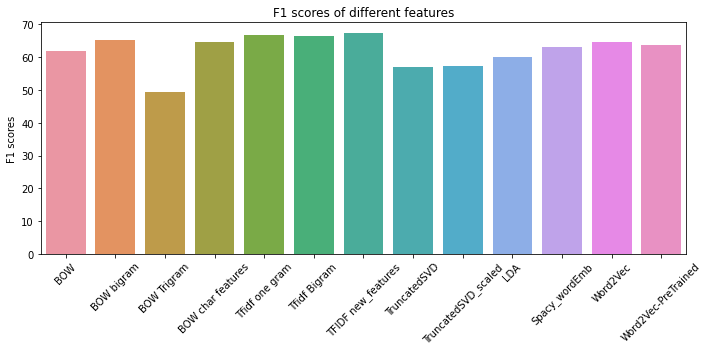

In [ ]:
fig, axes = plt.subplots(1,1,figsize=(10,5))
chart= sns.barplot(y=list(scores_dict.values()),x=list(scores_dict.keys()),ax=axes)
chart.set_xticklabels(chart.get_xticklabels(), rotation=45)
plt.title("F1 scores of different features")
plt.ylabel("F1 scores")
plt.tight_layout()

###Top 3 scores and feature types

In [ ]:
print(sorted(scores_dict.items(), key=lambda kv: kv[1],reverse=True)[:3])

[('TFIDF new_features', 67.18), ('Tfidf one gram', 66.66), ('Tfidf Bigram', 66.51)]


###Grid search for best model

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import Normalizer
from sklearn.pipeline import make_pipeline
param_grid = {"C": [100, 10, 1, 0.1, 0.001]
                           }
grid = GridSearchCV(LogisticRegression(max_iter=10000,solver='liblinear'),
                    param_grid=param_grid, cv=3, scoring="f1_macro",verbose=1,n_jobs=1
                   )

In [ ]:
grid.fit(X_train_new,y_train.values.ravel())
grid.best_params_

Fitting 3 folds for each of 5 candidates, totalling 15 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  15 out of  15 | elapsed:   44.0s finished


{'C': 100}

In [ ]:
get_metrics(grid.best_estimator_,X_train_new,y_train.values.ravel(),'TFIDF best model')

Accuracy:  70.91% 
Precision: 70.32% 
Recall:    70.91% 
F1 Score:  70.25% 


Acheived 71% accuracy and 70% f1 score with TFIDF with added new features